<a href="https://colab.research.google.com/github/hhh6593/TIL/blob/master/get_image_file_pr2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import tensorflow as tf
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [53]:
!ls

get_image_file_pr2.ipynb  light_intel.zip  seg_test  seg_train


In [54]:
!unzip light_intel.zip

Archive:  light_intel.zip
replace seg_test/buildings/20057.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: seg_test/buildings/20057.jpg  
  inflating: seg_test/buildings/20060.jpg  
  inflating: seg_test/buildings/20061.jpg  
  inflating: seg_test/buildings/20064.jpg  
  inflating: seg_test/buildings/20073.jpg  
  inflating: seg_test/buildings/20074.jpg  
  inflating: seg_test/buildings/20078.jpg  
  inflating: seg_test/buildings/20083.jpg  
  inflating: seg_test/buildings/20094.jpg  
  inflating: seg_test/buildings/20096.jpg  
  inflating: seg_test/buildings/20113.jpg  
  inflating: seg_test/buildings/20131.jpg  
  inflating: seg_test/buildings/20140.jpg  
  inflating: seg_test/buildings/20177.jpg  
  inflating: seg_test/buildings/20186.jpg  
  inflating: seg_test/buildings/20206.jpg  
  inflating: seg_test/buildings/20207.jpg  
  inflating: seg_test/buildings/20218.jpg  
  inflating: seg_test/buildings/20228.jpg  
  inflating: seg_test/buildings/20231.jpg  
  inflating: seg

In [55]:
!ls '/content/drive/My Drive/Colab Notebooks/seg_train'

buildings  forest  glacier  mountain  sea  street


In [56]:
train_path = '/content/drive/My Drive/Colab Notebooks/seg_train'
test_path = '/content/drive/My Drive/Colab Notebooks/seg_test'

In [57]:
batch_size=32
img_height=180
img_width=180

In [58]:
from tensorflow import keras
train_ds = keras.preprocessing.image_dataset_from_directory(
    train_path,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 3000 files belonging to 6 classes.


In [59]:
val_ds = keras.preprocessing.image_dataset_from_directory(
    test_path,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 600 files belonging to 6 classes.


In [60]:
class_names=train_ds.class_names

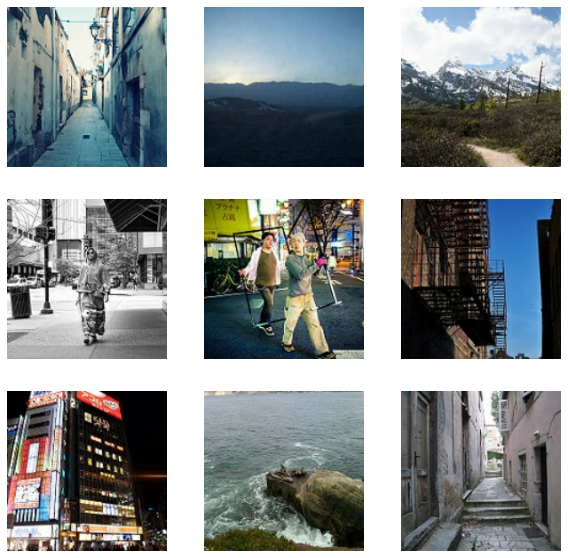

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))  #numpy() - tensor 행렬을  numpy행렬로 변환,uint8(0~255)
        plt.axis('off')

In [62]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


In [63]:
from tensorflow.keras import layers
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [64]:
normalization_layer

In [65]:
import numpy as np
normalization_ds = train_ds.map(lambda x,y : (normalization_layer(x),y))
image_batch, labels_batch = next(iter(normalization_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [66]:
auto = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=auto)
val_ds = val_ds.cache().prefetch(buffer_size=auto)

In [67]:
#모델 만들기
from tensorflow.keras.models import Sequential
num_classes = 5
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [68]:
#모델 컴파일
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits='True'),
              metrics=['accuracy'])

In [69]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 22, 22, 64)       

In [70]:
epochs=10
history=model.fit(train_ds,
                  validation_data=val_ds,
                  epochs=epochs)

Epoch 1/10
94/94 [==============================] - 9s 32ms/step - loss: nan - accuracy: 0.1700 - val_loss: nan - val_accuracy: 0.1667
Epoch 2/10
94/94 [==============================] - 2s 19ms/step - loss: nan - accuracy: 0.1738 - val_loss: nan - val_accuracy: 0.1667
Epoch 3/10
94/94 [==============================] - 2s 19ms/step - loss: nan - accuracy: 0.1674 - val_loss: nan - val_accuracy: 0.1667
Epoch 4/10
94/94 [==============================] - 2s 19ms/step - loss: nan - accuracy: 0.1532 - val_loss: nan - val_accuracy: 0.1667
Epoch 5/10
94/94 [==============================] - 2s 19ms/step - loss: nan - accuracy: 0.1717 - val_loss: nan - val_accuracy: 0.1667
Epoch 6/10
94/94 [==============================] - 2s 19ms/step - loss: nan - accuracy: 0.1716 - val_loss: nan - val_accuracy: 0.1667
Epoch 7/10
94/94 [==============================] - 2s 19ms/step - loss: nan - accuracy: 0.1699 - val_loss: nan - val_accuracy: 0.1667
Epoch 8/10
94/94 [==============================] - 2s 

In [71]:
history.history['loss']

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

Text(0.5, 1.0, 'training and validation loss')

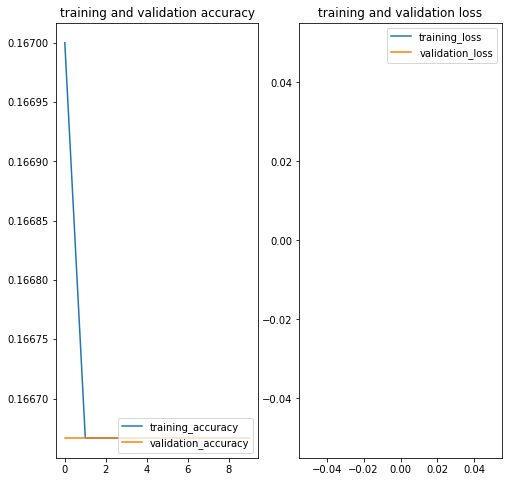

In [72]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label = 'training_accuracy')
plt.plot(epochs_range, val_acc, label = 'validation_accuracy')
plt.legend(loc = 'lower right')
plt.title('training and validation accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label = 'training_loss')
plt.plot(epochs_range, val_loss, label = 'validation_loss')
plt.legend(loc = 'upper right')
plt.title('training and validation loss')

In [74]:
#데이터 증강 - 이미지 데이터를 반전, 필터링, 색변환 등의 전처리를 통해서 더 많은 훈련 데이터를 추가시키는 과정 (과대적합 방지를 위함)
data_augmentation = keras.Sequential([layers.experimental.preprocessing.RandomFlip('horizontal',
                                                                                   input_shape=(img_height, img_width, 3)),
                                      layers.experimental.preprocessing.RandomRotation(0.1),
                                      layers.experimental.preprocessing.RandomZoom(0.1)])

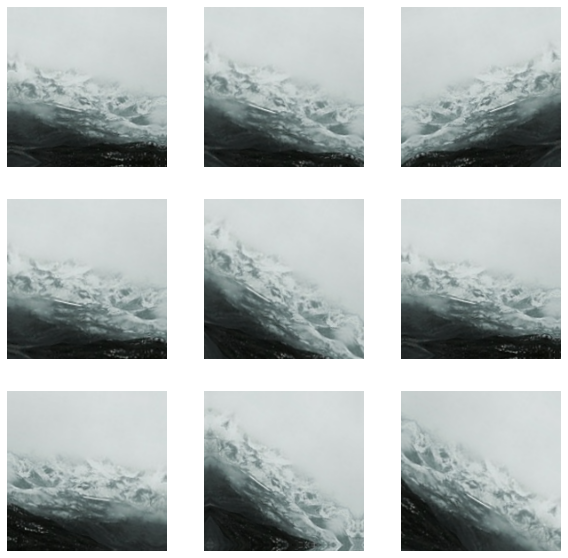

In [76]:
plt.figure(figsize=(10,10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(augmented_images[0].numpy().astype('uint8'))
    plt.axis('off')

In [77]:
#드롭아웃
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2), #은닉층 노드의 20%를 출력하지 않는다.
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [78]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [79]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_4 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 22, 22, 64)       

In [80]:
history=model.fit(train_ds,
                  validation_data=val_ds,
                  epochs=15)

Epoch 1/15
94/94 [==============================] - 2s 21ms/step - loss: nan - accuracy: 0.1591 - val_loss: nan - val_accuracy: 0.1667
Epoch 2/15
94/94 [==============================] - 2s 19ms/step - loss: nan - accuracy: 0.1630 - val_loss: nan - val_accuracy: 0.1667
Epoch 3/15
94/94 [==============================] - 2s 19ms/step - loss: nan - accuracy: 0.1574 - val_loss: nan - val_accuracy: 0.1667
Epoch 4/15
94/94 [==============================] - 2s 19ms/step - loss: nan - accuracy: 0.1780 - val_loss: nan - val_accuracy: 0.1667
Epoch 5/15
94/94 [==============================] - 2s 19ms/step - loss: nan - accuracy: 0.1567 - val_loss: nan - val_accuracy: 0.1667
Epoch 6/15
94/94 [==============================] - 2s 19ms/step - loss: nan - accuracy: 0.1642 - val_loss: nan - val_accuracy: 0.1667
Epoch 7/15
94/94 [==============================] - 2s 19ms/step - loss: nan - accuracy: 0.1632 - val_loss: nan - val_accuracy: 0.1667
Epoch 8/15
94/94 [==============================] - 2s 

Text(0.5, 1.0, 'training and validation loss')

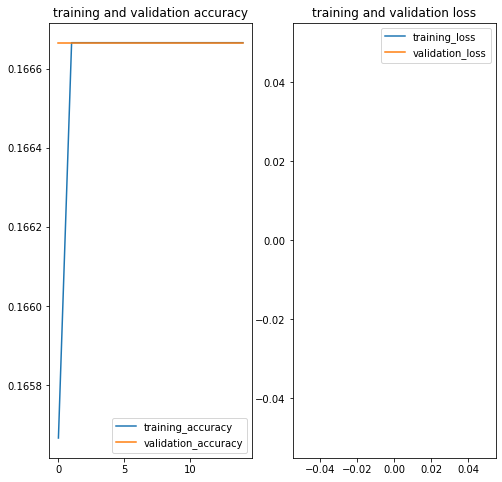

In [82]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label = 'training_accuracy')
plt.plot(epochs_range, val_acc, label = 'validation_accuracy')
plt.legend(loc = 'lower right')
plt.title('training and validation accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label = 'training_loss')
plt.plot(epochs_range, val_loss, label = 'validation_loss')
plt.legend(loc = 'upper right')
plt.title('training and validation loss')